# Spotify Streaming Analysis
#### by Tucker Paron
________________________________

## Overview & Motivation
As a 7-year spotify user, I've been able to watch as the platform has changed aesthetically and functionally over the years. The latter type of change has been of particular interest with my studies in computer science leading me to notice and appreciate the Spotify recommendation algorithms over the later part of this 7-year span. In these later years, I've noticed how often I've saved songs from 'song radio's' or 'Discover Weekly'  (a playlist containing songs which Spotify thinks an individual would like based on their listening hsotory) playlists. Out of curiousity of how the algorithm works, along with a general want to look at my summary statistics via Python (similar to a Spotify Wrapped), I've decided to embark on this Spotify data project in the hopes of making some general discoveries and to gain a better understanding for how their data is used.

## Data
The data being used is Spotify's generated data of my listening history and account details from the past year. The data is presented as a series of json files curated by Spotify after requesting the information via the 'Privacy Settings' page of my account. The data was downloaded through an email link sent a few days after the request (although it can take up to 30 days). The specifics of each json file are described [here](https://support.spotify.com/us/article/understanding-my-data/), but the primary sets being used are those with my streaming history. Of note, none of this data offers music style information such as 'dancability' or 'energy'. This data must be accessed via the Spotify API - something I plan on doing in the coming months. 

In [153]:
# Import packages.
import json
import numpy as np
from statistics import mode
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter

# Load data.
file1 = open('data/StreamingHistory0.json')
file2 = open('data/StreamingHistory1.json')
file3 = open('data/StreamingHistory2.json')

# Process data.
data1 = json.load(file1)
data2 = json.load(file2)
data3 = json.load(file3)
data = data1 + data2 + data3

tracks = [ d['trackName'] for d in data ] # Let's get all the tracks in order of streams.
tracks_ordered = [item for items, c in Counter(tracks).most_common() for item in [items] * c]
tracks_ordered = [i for n, i in enumerate(tracks_ordered) if i not in tracks_ordered[:n]] 

artists = [ d['artistName'] for d in data ] # Same for artists.
artists_ordered = [item for items, c in Counter(artists).most_common() for item in [items] * c]
artists_ordered = [i for n, i in enumerate(artists_ordered) if i not in artists_ordered[:n]] 

## Exploration & Analysis
Before doing any real analysis, it's first important to do some basic exploration of my listening history this past year. Let's first look into which songs and artists I listened to the most. 

In [121]:
# What song did I listen to the most? Which artist?
print('I listened to', mode(artists), 'the most.', mode(tracks), 'was my most played track.')

I listened to Sleepy Hallow the most. Molly was my most played track.


In [122]:
# What about my top ten songs? Artists?
print('These are the 10 songs I listened to the most.')
i = 1  
for t in tracks_ordered[:10]:
    print(str(i) + '. ', t)
    i+=1
    
print('\nNow the artists...')
i = 1  
for t in artists_ordered[:10]:
    print(str(i) + '. ', t)
    i+=1

These are the 10 songs I listened to the most.
1.  Molly
2.  Weight On Me
3.  2020 Vision
4.  Kontrol
5.  RAPSTAR
6.  6am In NY
7.  Pressure
8.  GANG GANG (with Lil Wayne)
9.  Bestie
10.  Attachments

Now the artists...
1.  Sleepy Hallow
2.  YoungBoy Never Broke Again
3.  Polo G
4.  Sheff G
5.  Drake
6.  A Boogie Wit da Hoodie
7.  Lil Mosey
8.  Lil Tjay
9.  Lil Uzi Vert
10.  Kanye West


This is a good start, but it may be helpful to see just how long I've spent listening to these songs and artists over the course of the year. Maybe this can be visualized...

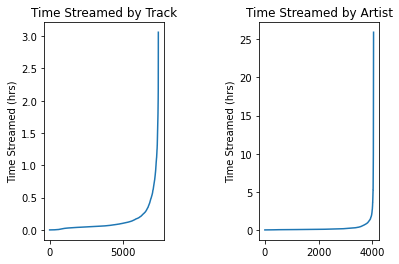

In [124]:
# Create a new dictionary of all streamed songs and there total play time in seconds.
tracks_time = {}
artists_time = {}
for d in data:
    if d['trackName'] not in tracks_time:
        tracks_time[d['trackName']] = ( d['msPlayed'] / 3600000 ) # Convert ms to hours
    else:
        tracks_time[d['trackName']] += ( d['msPlayed'] / 3600000 )
    
    if d['artistName'] not in artists_time:
        artists_time[d['artistName']] = ( d['msPlayed'] / 3600000 )
    else:
        artists_time[d['artistName']] += ( d['msPlayed'] / 3600000 )

track_stream_times = tracks_time.values()
artist_stream_times = artists_time.values()

# Plot
fig, axs = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.8)
axs[0].plot(sorted(track_stream_times))
axs[0].set_title("Time Streamed by Track")
axs[0].set_ylabel("Time Streamed (hrs)")
axs[1].plot(sorted(artist_stream_times))
axs[1].set_title("Time Streamed by Artist")
axs[1].set_ylabel("Time Streamed (hrs)");

The above left-most plot shows a plot of all 7428 unique songs streamed over the past year. The data is ordered by x-value from least amount of time to most amount of time streamed. As is demonstrated by the graph, there is an exponential shape to the distribution with the vast majority (~ 7000) falling below the 15 minute (.25 hr) mark. This points to the rest of the songs (~ 400) being favored, as these were listened to far more than the majority. Given my frequent use of Discover Weekly's and song radios (as menioned in the overview) I am exposed to lots of new music, a good portion of which I may not like enough to listen to repeatedly or even more than once - this could further explain the shape of the distribution. 
The right-most plot is the same idea except for artists, not just individual songs. This distribution is similar but much more exagerated. This is becuase many of the songs that I listen to are from a small selection of artists, and many of the songs that I randomly come across are likley from a variety of artists. This leads to the concentration of streaming time into a small group of artists as is shown by the plot.

Lastly, I'm also curious to know how listening habits with my favorite songs and artists changed over the course of the year. To illustrate this, a time-series plot is likely the best option.

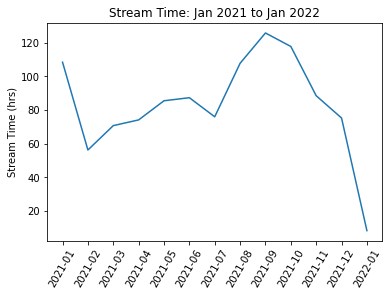

In [129]:
# Time series data processing.
time_series_times = {}
for d in data:
    d['endTime'] = d['endTime'][:7] # Only include Year-Month
    if d['endTime'] not in time_series_tracks:
        time_series_tracks[d['endTime']] = ( d['msPlayed'] / 3600000 )
    else:
        time_series_tracks[d['endTime']] += ( d['msPlayed'] / 3600000 )

x = time_series_tracks.keys()
y = time_series_tracks.values()
plt.plot(x,y)
plt.title('Stream Time: Jan 2021 to Jan 2022')
plt.ylabel('Stream Time (hrs)')
plt.xticks(rotation = 60);

The above plot offers a simple demonstration of my stream time in hours by month. There is a clear peak from August 2021 to October 2021 - I'd attribute this to a big podcast streaming phase. I listened to a lot of podcasts during this time, especially towards the end of Summer when I had a 2.5 hour round trip commute for work. I also had recently gotten Apple's Airpods around this time (late August) which allowed me to listen anywhere much more conveniently as I could just pop them in as opposed to struggling with a cable. This likely explains maintained peak in stream time in the latter stages of September and October when I was no longer commuting. The steep decline seen on January of this new year (2022) is just because their is only data for the first few days of the month. While this plot shows a general overview of my listening trends, it may be interesting to see how my favorite artists changed over the course of the year. To avoid clutter on the graph, let's select about five artists whom I particularly like and see how they ranked against one another throughout the 12-month span.

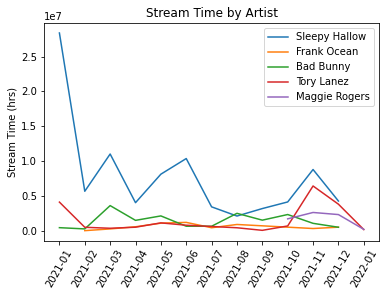

In [152]:
times_series_all = {}
for d in data:
    d['endTime'] = d['endTime'][:7] # Only include Year-Month
    if d['artistName'] not in times_series_all.keys():
        times_series_all[d['artistName']]={d['endTime']:d['msPlayed']}
    elif d['artistName'] in times_series_all.keys() and d['endTime'] not in times_series_all[d['artistName']].keys():
        times_series_all[d['artistName']][d['endTime']] = d['msPlayed']
    elif d['artistName'] in times_series_all.keys() and d['endTime'] in times_series_all[d['artistName']].keys():
        times_series_all[d['artistName']][d['endTime']] += d['msPlayed']

x1 = times_series_all['Sleepy Hallow'].keys()  
y1 = times_series_all['Sleepy Hallow'].values()
x2 = times_series_all['Frank Ocean'].keys()  
y2 = times_series_all['Frank Ocean'].values()
x3 = times_series_all['Bad Bunny'].keys()  
y3 = times_series_all['Bad Bunny'].values()
x4 = times_series_all['Tory Lanez'].keys()  
y4 = times_series_all['Tory Lanez'].values()
x5 = times_series_all['Maggie Rogers'].keys()  
y5 = times_series_all['Maggie Rogers'].values()

plt.plot(x1,y1, label = 'Sleepy Hallow')
plt.plot(x2,y2, label = 'Frank Ocean')
plt.plot(x3,y3, label = 'Bad Bunny')
plt.plot(x4,y4, label = 'Tory Lanez')
plt.plot(x5,y5, label = 'Maggie Rogers')
plt.title('Stream Time by Artist')
plt.ylabel('Stream Time (hrs)')
plt.xticks(rotation = 60)
plt.legend();


Looking more specifically at artists over this time period, we can visualize some big differences. The five selected artists are simply ones that I am currently more interested in - I also tried to select with some variety in genre and style (Sleepy Hallow is 'Brooklyn Drill', Maggie Rogers is 'Indie Pop', etc.). As we learned from the preliminary analysis, Sleepy Hallow, depicted by the blue line, yields much higher stream time from myself, particularly in January of 2021 - I believe this was shortly after he released a new album (or at when I learned of it). I believe the other spikes may be from single releases. The other artists stay relatively more consistent with the exception of Tory Lanez who started relatively high in January 2021 and had a spike in November - this spike is due almost entirely due to one song called 'BDay'... I listened to it a lot in November and early December. Also of note, some lines don't span the entirity of the plot. Frank Ocean for example has no data in January of 2021 or 2022. I simply don't listen to him a whole lot despite liking his music. Maybe I don't listen to him in Janauary, generally a jolly time, because his music can be rather somber? Maggie Rogers also has a shorter line, starting only in October. This is when I discovered her and you can see her line taper off a bit. I would assume this is just because I listened to her music a lot when I first found her but then may have overplayed it as I often do. Again, this is just a sample of artists selected for no true purpose other than observation - but this could be done with any selection of artists, so long as the lines remain visible.

## Results & Conclusion

Given this project's rather unscientific nature, there aren't any big discoveries to be noted; however, it was certainly interesting to work with and better understand how Spotify stores their users' data and create their suggestions and services such as Spotify Wrapped. It was also fascinating to see the trends of listening both in general and by each artist. This allowed for some real investigate thought when trying to justify or explain the peaks and lows of the plots (ie. I was particularly sad this month so I listened to this artist who has a wistful style). In future work I'd love to be able to categorize artists and songs by category so I could do further analysis on my own mood or standing in life and how it relates to what kind of music I am taking in. I believe this may be accessible in the Spotify API, as I mentioned in the data section, so I'll certainly keep my eyes out for that.